In [100]:
import os
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# This is for the Cluster

Going to test my new algorithm on the cluster. 

/Users/mattocallaghan/miniforge3/envs/astro/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (11,12,15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


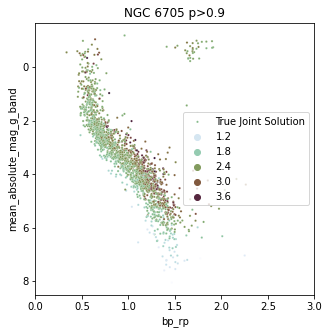

In [101]:
os.chdir("Data")
cluster_df=pd.read_csv('cluster_members_final.csv')
os.chdir("../")


probability='p3'
f, axes = plt.subplots(1, 1)
f.set_figheight(5)
f.set_figwidth(5)

cluster_df=cluster_df[cluster_df['phot_bp_mean_flux_error']<1000].reset_index(drop=True)

scatter=cluster_df[cluster_df[probability]>0.9]
cluster_df=cluster_df[cluster_df[probability]>0.9]

sn.scatterplot(x=scatter['bp_rp'],y=scatter['mean_absolute_mag_g_band'],hue=scatter['rgeo'],s=5,ax=axes,label='True Joint Solution',color='b', palette="ch:r=1,l=1.0")
axes.invert_yaxis()
plt.legend()
axes.set_title("NGC 6705 p>0.9")
plt.xlim(0,3)
plt.show()

In [102]:
cluster_df=cluster_df[['ra','dec','parallax','phot_g_mean_mag','phot_g_mean_flux','phot_rp_mean_flux','phot_bp_mean_flux','phot_bp_mean_mag','phot_rp_mean_mag','bp_rp','mean_absolute_mag_g_band','ra_error','dec_error','parallax_error','phot_g_mean_flux_error','phot_bp_mean_flux_error','phot_rp_mean_flux_error']].reset_index(drop=True)
cluster_df

,ra,dec,parallax,phot_g_mean_mag,phot_g_mean_flux,phot_rp_mean_flux,phot_bp_mean_flux,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,mean_absolute_mag_g_band,ra_error,dec_error,parallax_error,phot_g_mean_flux_error,phot_bp_mean_flux_error,phot_rp_mean_flux_error
0,282.605871,-6.285981,0.507387,16.404120,5.167716e+03,3876.549346,2425.859397,16.876379,15.776782,1.099597,4.856261,0.049640,0.053262,0.068056,3.639983,10.207194,14.392979
1,282.610660,-6.223920,0.414973,15.952048,7.836598e+03,5993.184109,3729.496588,16.409416,15.303751,1.105665,4.090620,0.042647,0.041917,0.053403,4.474360,15.521529,8.868863
2,282.610679,-6.250028,0.464578,16.118809,6.720840e+03,5265.982076,3198.065088,16.576324,15.444197,1.132128,4.479413,0.045167,0.044909,0.052555,3.836132,10.380806,18.499730
3,282.615905,-6.195400,0.455174,16.738075,3.799412e+03,3552.040656,1709.063662,17.256647,15.871700,1.384947,4.786609,0.064142,0.066674,0.092999,4.374199,9.564557,21.343086
4,282.617394,-6.285022,0.386008,14.585701,2.758459e+04,17640.015588,15755.160439,14.844985,14.131648,0.713337,2.684100,0.021657,0.020979,0.025863,10.341982,28.872372,83.859900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,282.844474,-6.035441,0.555500,17.378784,2.105878e+03,1859.903861,834.630940,18.034805,16.574170,1.460636,5.682174,0.087949,0.103732,0.129928,2.685649,8.458553,20.671124
1701,282.856958,-6.023364,0.436901,10.448225,1.246398e+06,888703.772511,633674.511865,10.833877,9.876003,0.957873,-1.190251,0.013677,0.013188,0.015801,297.194850,543.663600,344.572200
1702,282.723210,-6.035772,0.484665,17.777810,1.458220e+03,1389.416405,490.642074,18.611630,16.890814,1.720816,5.745537,0.115876,0.118419,0.159739,2.250054,8.263207,11.005263
1703,282.781765,-6.019287,0.365988,15.937283,7.943893e+03,6497.059296,3432.168814,16.499620,15.216104,1.283517,3.784242,0.048544,0.047997,0.058159,3.754416,11.185130,12.515312


# Errors as per Gaia recommendations for the Photometric effects

In [103]:
cluster_df['phot_g_mean_mag_error']=np.sqrt(((2.5/np.log(10))*cluster_df['phot_g_mean_flux_error']/cluster_df['phot_g_mean_flux'])**2+0.0027553202**2)
cluster_df['bp_error']=np.sqrt(((2.5/np.log(10))*cluster_df['phot_bp_mean_flux_error']/cluster_df['phot_bp_mean_flux'])**2+0.0037793818**2)
cluster_df['rp_error']=np.sqrt(((2.5/np.log(10))*cluster_df['phot_rp_mean_flux_error']/cluster_df['phot_rp_mean_flux'])**2+0.0027901700**2)
cluster_df['bp_rp_error']=np.sqrt(cluster_df['rp_error']**2+cluster_df['bp_error']**2)

# Feature scaling might be important 

However, we can (I think) just untransform before the likelihood is done. Provided Pytorch allows us to propegate backwards through a scaling operation. I suppose we can actually just do manual scaling using Pytorch operations for MinMaxScaler and that would be fine.

# Data format

(batch size, sequence length, input dimension)
LSTMs learn ? over a longer period of time so my distance data will be batch_size, 1, 1,.

Circular lstm kind of thing? Anyway for now we say the only long term memory that is needed is the distance. Ra and Dec is somehting there but thats a local correlation and I'll try include that in the error function


# Draw instances of each row.

We will draw instances from a Gaussian of each row to simulate the error in our data.

#### Prior on Distance

We will need some sort of prior on distances. In this problem our distances are fairly tuned so I will just invert the parallax as the distance.

(array([2.540e+02, 1.114e+03, 2.250e+02, 5.300e+01, 2.900e+01, 1.200e+01,
        9.000e+00, 5.000e+00, 3.000e+00, 1.000e+00]),
 array([0.24607977, 0.37101558, 0.49595139, 0.62088719, 0.745823  ,
        0.8707588 , 0.99569461, 1.12063042, 1.24556622, 1.37050203,
        1.49543784]),
 <BarContainer object of 10 artists>)

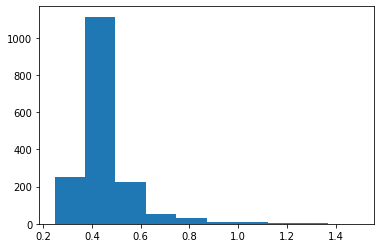

In [104]:
plt.hist(cluster_df['parallax'])

#### Normal distribution draws

Eventually should put in the cross correlations but for now isotropic.

In [105]:
mean_x=cluster_df[['ra','dec','parallax','phot_g_mean_mag','bp_rp']].to_numpy()
var_x=cluster_df[['ra_error','dec_error','parallax_error','phot_g_mean_mag_error','bp_rp_error']].to_numpy()**2

In [106]:
x_params=[]
x_var=[]
draw_size=32
for i in range (len(mean_x)):
    mu=mean_x[i]
    sig=np.diag(var_x[i])
    draws = np.random.multivariate_normal(mu, sig, size=draw_size)

    x_params.append(draws)
    x_var.append(np.tile(sig,(draw_size,1)))


In [107]:
x_params=np.array(x_params)
x_params=x_params.reshape((x_params.shape[0]*x_params.shape[1],x_params.shape[2]))


In [108]:
x_var=np.array(x_var)
x_var=x_var.reshape((x_var.shape[0]*x_var.shape[1],x_var.shape[2]))


In [109]:
x_params.shape

(54560, 5)

In [110]:
resampled_x=pd.DataFrame(data=x_params,columns=[['ra','dec','parallax','phot_g_mean_mag','bp_rp']])
resampled_err=pd.DataFrame(data=x_params,columns=[['ra_error','dec_error','parallax_error','phot_g_mean_mag_error','bp_rp_error']])
resampled_x['ra']=resampled_x['ra']%360
resampled_x['dec']=resampled_x['dec']%360

In [111]:
def mean_basolute_mag_g_band(selection_gaia):

    return selection_gaia['phot_g_mean_mag'].values+5*np.log10(selection_gaia['parallax'].values/1000)+5
    

resampled_x['G']=mean_basolute_mag_g_band(resampled_x)
cluster_df['G']=mean_basolute_mag_g_band(cluster_df)


/var/folders/tm/gnjj0w_d6vj9x6q_ww3f6jsw0000gn/T/ipykernel_78845/4156368074.py:3: RuntimeWarning: invalid value encountered in log10
  return selection_gaia['phot_g_mean_mag'].values+5*np.log10(selection_gaia['parallax'].values/1000)+5


In [112]:
x_resample=pd.concat([resampled_x,resampled_err],axis=1)

In [113]:
x_resample

,ra,dec,parallax,phot_g_mean_mag,bp_rp,G,ra_error,dec_error,parallax_error,phot_g_mean_mag_error,bp_rp_error
0,282.600648,353.680059,0.668459,16.399673,1.109882,5.525049,282.600648,353.680059,0.668459,16.399673,1.109882
1,282.630564,353.769818,0.490060,16.407051,1.100264,4.858297,282.630564,353.769818,0.490060,16.407051,1.100264
2,282.558103,353.718854,0.606595,16.402189,1.104443,5.316681,282.558103,353.718854,0.606595,16.402189,1.104443
3,282.730457,353.740488,0.540402,16.406798,1.103831,5.070380,282.730457,353.740488,0.540402,16.406798,1.103831
4,282.614156,353.745847,0.450069,16.406525,1.104146,4.672922,282.614156,353.745847,0.450069,16.406525,1.104146
...,...,...,...,...,...,...,...,...,...,...,...
54555,282.749587,353.762047,0.502931,17.502809,1.663321,6.010350,282.749587,353.762047,0.502931,17.502809,1.663321
54556,282.621884,354.164996,0.283816,17.500161,1.663494,4.765345,282.621884,354.164996,0.283816,17.500161,1.663494
54557,282.825318,353.915251,0.401691,17.502003,1.686249,5.521462,282.825318,353.915251,0.401691,17.502003,1.686249
54558,282.627309,354.094852,0.738772,17.502049,1.641260,6.844601,282.627309,354.094852,0.738772,17.502049,1.641260


# Error understanding


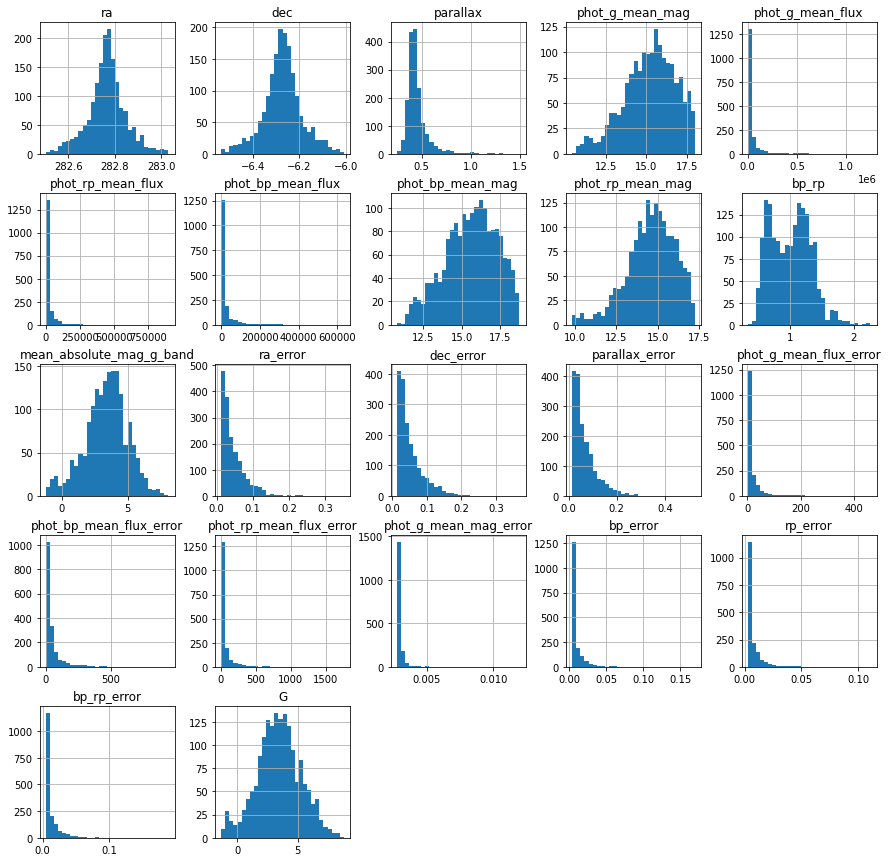

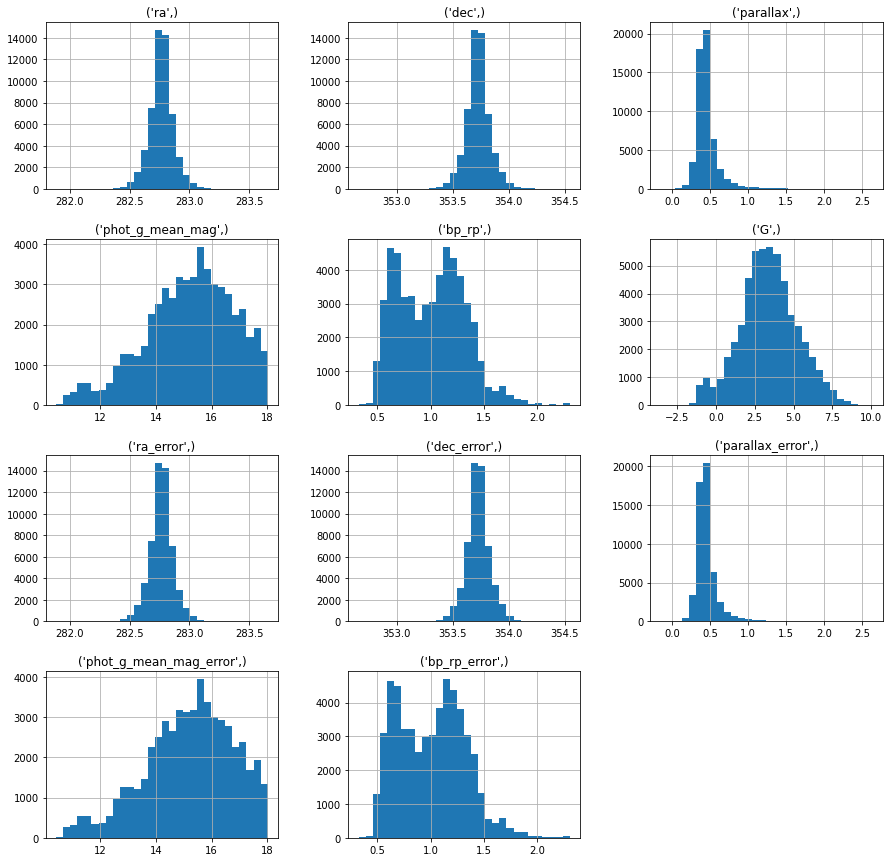

In [114]:
cluster_df.hist(bins=30, figsize=(15, 15))
x_resample.hist(bins=30, figsize=(15, 15))
plt.show()

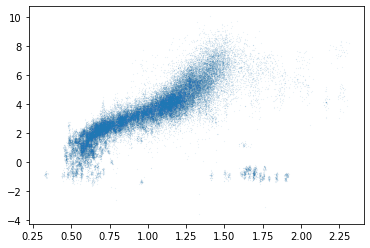

In [115]:
plt.scatter(x_resample['bp_rp'],x_resample['G'],s=0.001)

In [120]:
x_resample=x_resample.dropna().reset_index(drop=True)

# Algorithm Design

In [121]:
import minimint

In [122]:
filters = ["Gaia_G_EDR3", "Gaia_BP_EDR3", 'Gaia_RP_EDR3']
ii = minimint.Interpolator(filters)


(20.0, -5.0)

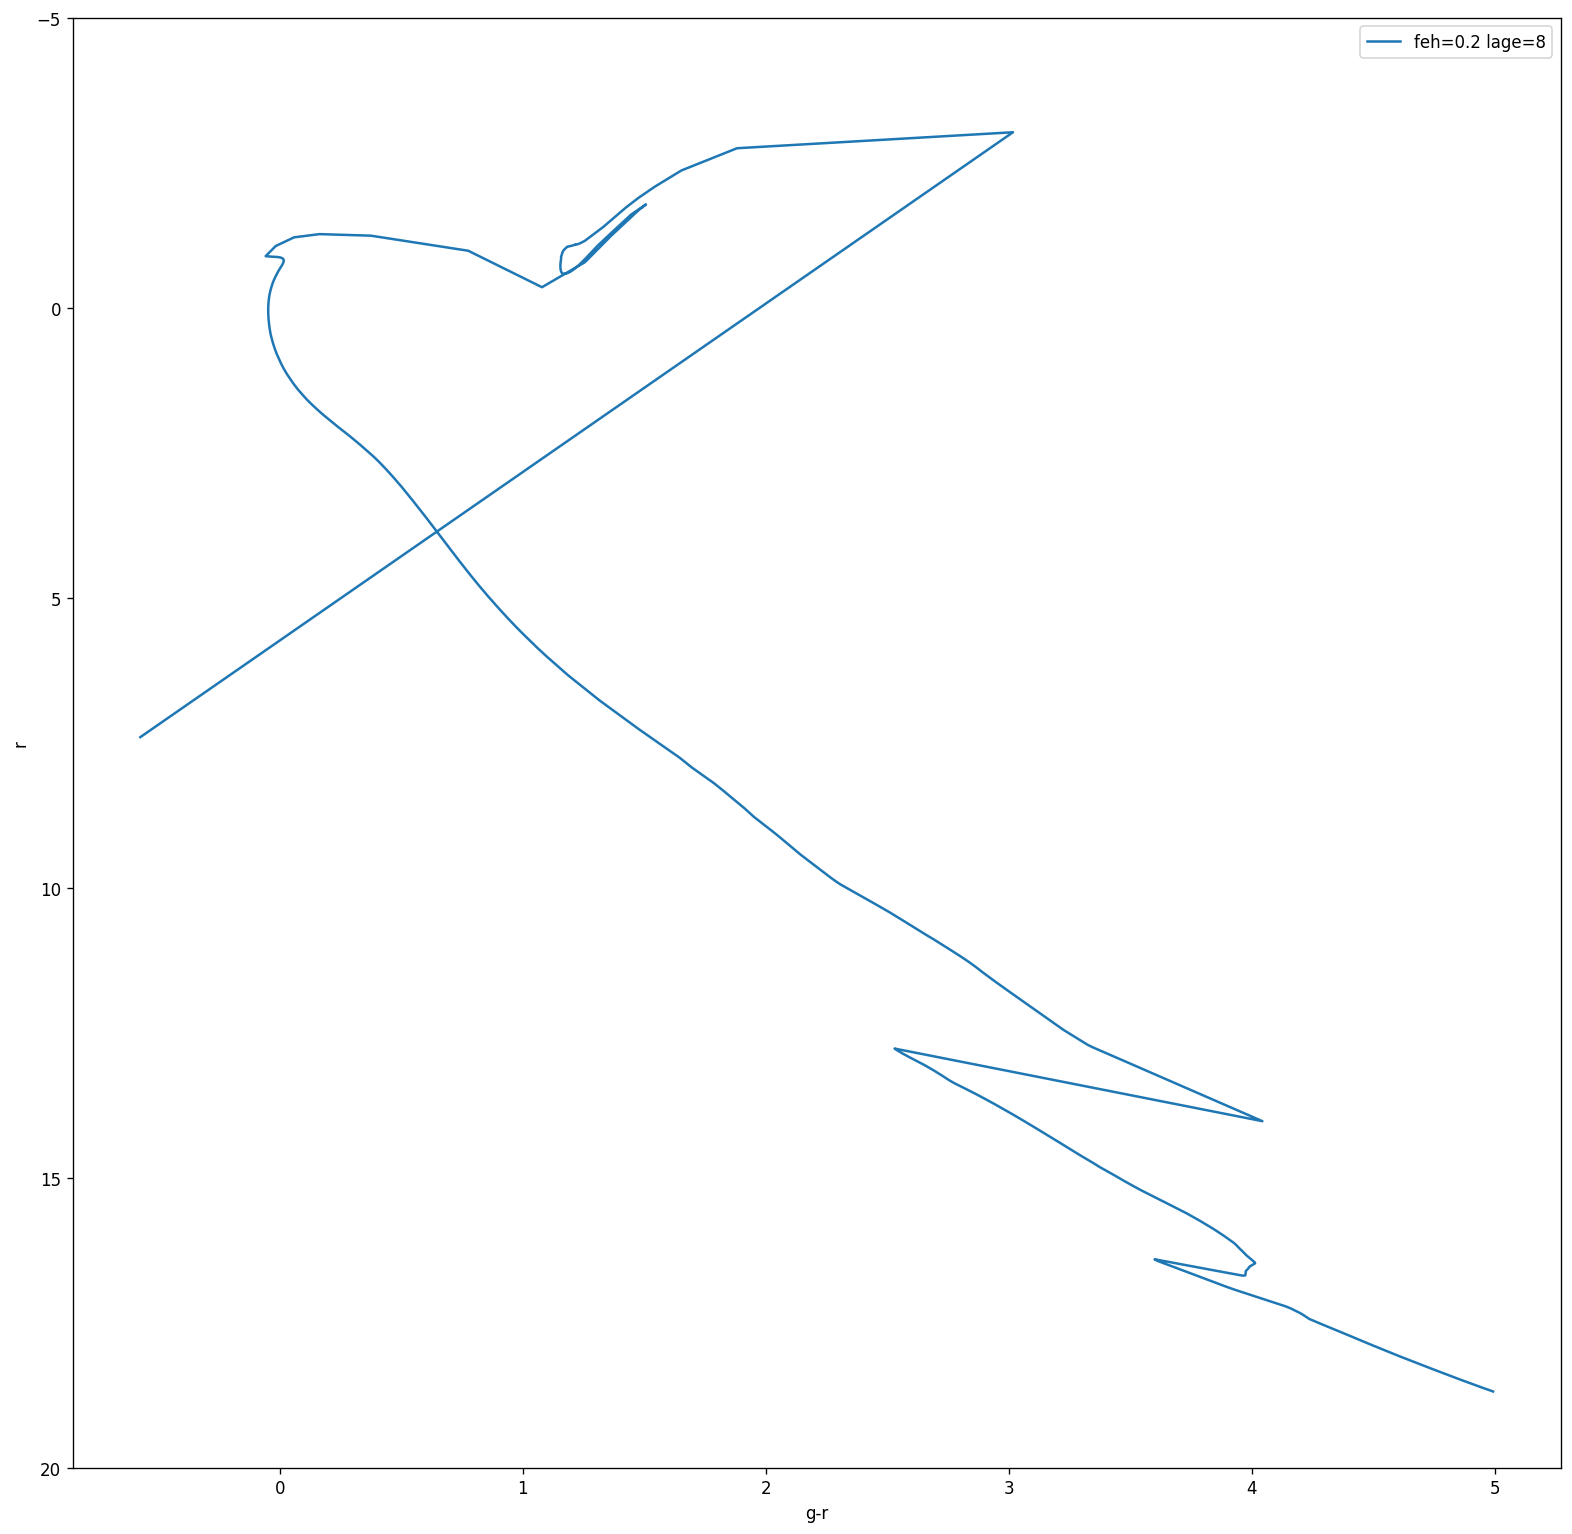

In [125]:
# Compute the isochrones
massgrid = 10*np.linspace(np.log10(0.1),np.log10(10), 10000)
logagegrid = [8.5]
fehgrid = [0.17]
fig = plt.figure(figsize=(16, 16), dpi=120)
for feh in fehgrid:
    for lage in logagegrid:
        iso = ii(massgrid, lage, feh)
        plt.plot(iso['Gaia_BP_EDR3']-iso['Gaia_RP_EDR3'], iso['Gaia_G_EDR3'],
                 label='feh=%.1f lage=%d' % (feh, lage))
plt.legend()
plt.xlabel('g-r')
plt.ylabel('r')
plt.ylim(20, -5)